# DSP Assingment 2
This test code has been written heavily in colaboration with ChatGPT to visualize my thoughts and should not be considers as my original work.

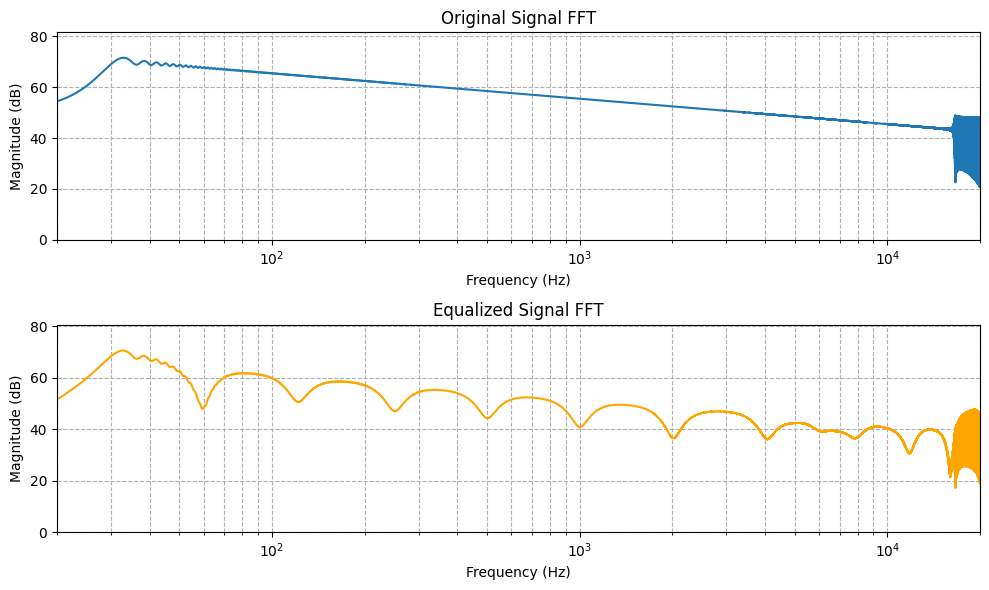

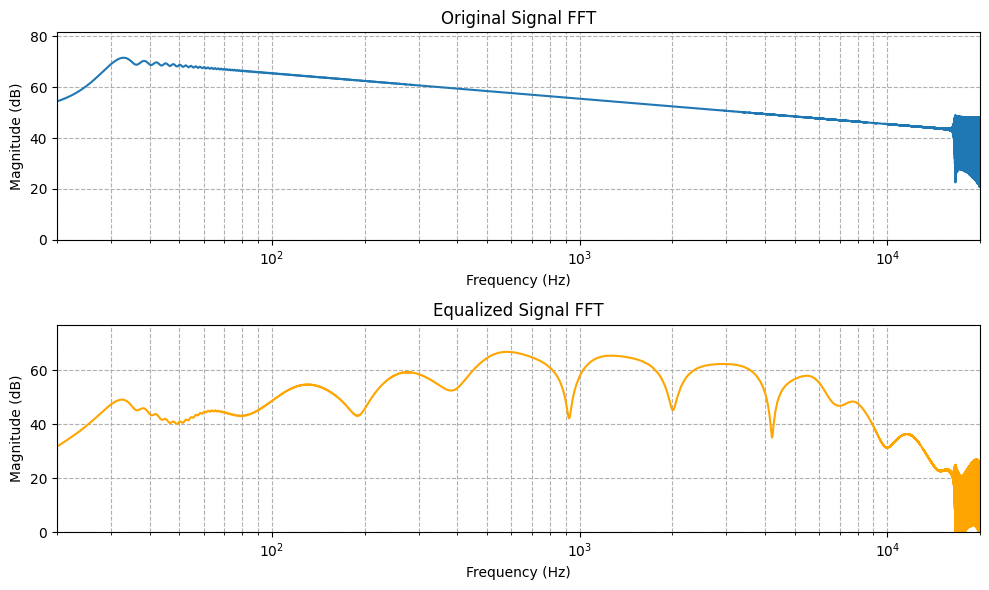

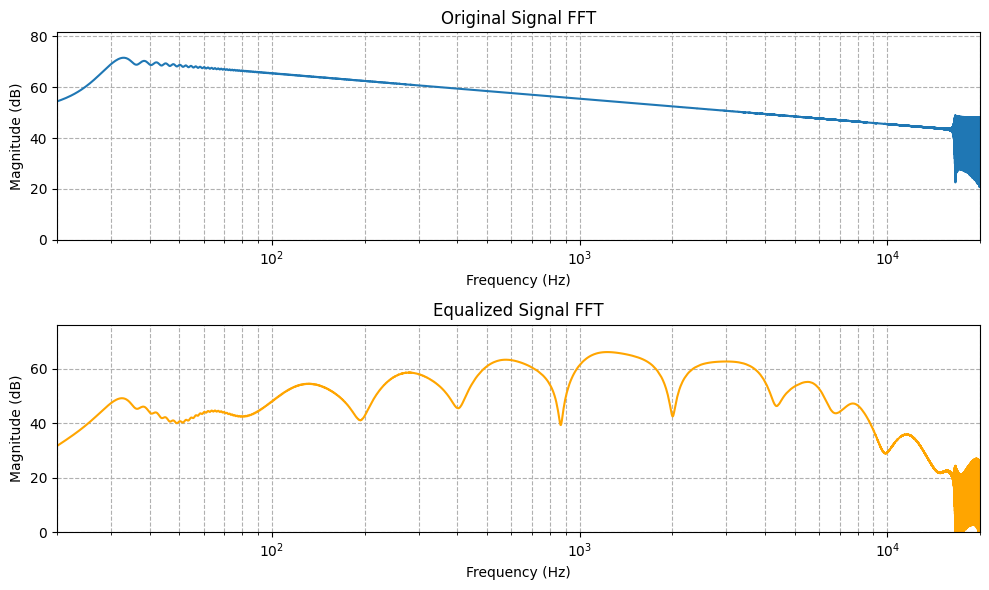

In [ ]:
from scipy.signal import butter, lfilter, freqz
from scipy.fft import fft, fftfreq
import tkinter as tk
import numpy as np
import matplotlib.pyplot as plt
from tkinter import Label, Scale, Button, VERTICAL

def bandpass_filter_compensated(data, lowcut, highcut, fs, order=2): 
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    
    w, h = freqz(b, a, worN=8000, fs=fs)
    peak_gain = np.max(np.abs(h))  
    b /= peak_gain  
    
    return lfilter(b, a, data)

def generate_test_signal(duration, fs):
    t = np.linspace(0, duration, int(fs * duration), endpoint=False)
    sweep = np.sin(2 * np.pi * np.logspace(np.log10(20), np.log10(20000), t.size))
    return t, sweep

def apply_equalizer(data, fs, gains):
    bands = [
        (20, 60), (60, 120), (120, 250), (250, 500),
        (500, 1000), (1000, 2000), (2000, 4000),
        (4000, 6000), (6000, 8000), (8000, 12000),
        (12000, 16000), (16000, 20000)
    ]
    filtered_signals = []
    for i, (lowcut, highcut) in enumerate(bands):
        filtered = bandpass_filter_compensated(data, lowcut, highcut, fs)
        filtered_signals.append(gains[i] * filtered)
    return sum(filtered_signals)

def compute_fft(signal, fs):
    n = len(signal)
    fft_result = fft(signal)
    freqs = fftfreq(n, 1 / fs)[:n // 2]
    magnitudes = np.abs(fft_result)[:n // 2]
    return freqs, magnitudes

def process_signal(gains, signal, fs):
    equalized_signal = apply_equalizer(signal, fs, gains)

    freqs, original_fft = compute_fft(signal, fs)
    _, equalized_fft = compute_fft(equalized_signal, fs)

    plt.figure(figsize=(10, 6))

    plt.subplot(2, 1, 1)
    plt.plot(freqs, 20 * np.log10(original_fft), label="Original Signal")
    plt.title("Original Signal FFT")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Magnitude (dB)")
    plt.xscale("log")  
    plt.xlim(20, 20000)  
    plt.ylim(0, np.max(20 * np.log10(original_fft)) + 10)
    plt.grid(True, which="both", linestyle="--")  
    
    plt.subplot(2, 1, 2)
    plt.plot(freqs, 20 * np.log10(equalized_fft), label="Equalized Signal", color="orange")
    plt.title("Equalized Signal FFT")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Magnitude (dB)")
    plt.xscale("log")  
    plt.xlim(20, 20000)  
    plt.ylim(0, np.max(20 * np.log10(equalized_fft)) + 10)
    plt.grid(True, which="both", linestyle="--")  
    
    plt.tight_layout()
    plt.show()

def main():
    fs = 44100  
    duration = 5  
    t, signal = generate_test_signal(duration, fs)

    root = tk.Tk()
    root.title("12-Band Equalizer")
    root.geometry("900x400")

    bands = [
        (20, 60), (60, 120), (120, 250), (250, 500),
        (500, 1000), (1000, 2000), (2000, 4000),
        (4000, 6000), (6000, 8000), (8000, 12000),
        (12000, 16000), (16000, 20000)
    ]

    Label(root, text="Adjust the gain for each band", font=("Helvetica", 14)).pack(pady=10)

    slider_frame = tk.Frame(root)
    slider_frame.pack()

    sliders = []
    for i, (lowcut, highcut) in enumerate(bands):
        slider = Scale(
            slider_frame, 
            from_=5, to=0.1,  
            resolution=0.1, 
            orient=tk.VERTICAL
        )
        slider.set(1)  
        slider.grid(row=1, column=i, padx=5)
        sliders.append(slider)

        Label(slider_frame, text=f"{lowcut}-{highcut} Hz", font=("Helvetica", 8)).grid(row=2, column=i)

    def execute():
        gains = [slider.get() for slider in sliders]
        process_signal(gains, signal, fs)

    Button(root, text="Execute", command=execute, font=("Helvetica", 12), bg="lightblue").pack(pady=20)

    root.mainloop()

if __name__ == "__main__":
    main()


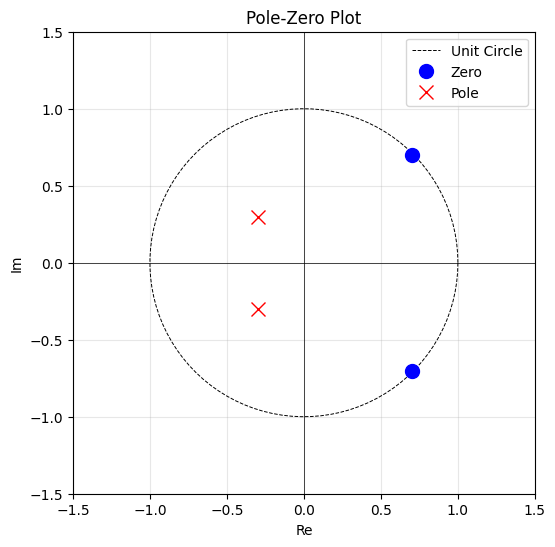

In [4]:
import matplotlib.pyplot as plt
import numpy as np


zeros = [ 0.7 + 0.7j, 0.7 - 0.7j]  
poles = [ -0.3 + 0.3j, -0.3 - 0.3j]  

plt.figure(figsize=(6, 6))

theta = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.cos(theta), np.sin(theta), 'k--', linewidth=0.7, label='Unit Circle')  

for zero in zeros:
    plt.plot(np.real(zero), np.imag(zero), 'bo', markersize=10, label='Zero' if zeros.index(zero) == 0 else "")  

for pole in poles:
    plt.plot(np.real(pole), np.imag(pole), 'rx', markersize=10, label='Pole' if poles.index(pole) == 0 else "")  

plt.axhline(0, color='k', linewidth=0.5)
plt.axvline(0, color='k', linewidth=0.5)

plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.xlabel('Re')
plt.ylabel('Im')
plt.title('Pole-Zero Plot')
plt.grid(alpha=0.3)

handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), loc='upper right', fontsize=10)

plt.gca().set_aspect('equal', adjustable='box')

plt.show()
